In [35]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/playground-series-s4e10/sample_submission.csv
/kaggle/input/playground-series-s4e10/train.csv
/kaggle/input/playground-series-s4e10/test.csv


In [36]:
import pandas as pd
train_df = pd.read_csv('/kaggle/input/playground-series-s4e10/train.csv')
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 58645 entries, 0 to 58644
Data columns (total 13 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   id                          58645 non-null  int64  
 1   person_age                  58645 non-null  int64  
 2   person_income               58645 non-null  int64  
 3   person_home_ownership       58645 non-null  object 
 4   person_emp_length           58645 non-null  float64
 5   loan_intent                 58645 non-null  object 
 6   loan_grade                  58645 non-null  object 
 7   loan_amnt                   58645 non-null  int64  
 8   loan_int_rate               58645 non-null  float64
 9   loan_percent_income         58645 non-null  float64
 10  cb_person_default_on_file   58645 non-null  object 
 11  cb_person_cred_hist_length  58645 non-null  int64  
 12  loan_status                 58645 non-null  int64  
dtypes: float64(3), int64(6), object

In [37]:
train_df_encoded = pd.get_dummies(data=train_df, columns=train_df.select_dtypes('object').columns)
train_df_encoded.columns

Index(['id', 'person_age', 'person_income', 'person_emp_length', 'loan_amnt',
       'loan_int_rate', 'loan_percent_income', 'cb_person_cred_hist_length',
       'loan_status', 'person_home_ownership_MORTGAGE',
       'person_home_ownership_OTHER', 'person_home_ownership_OWN',
       'person_home_ownership_RENT', 'loan_intent_DEBTCONSOLIDATION',
       'loan_intent_EDUCATION', 'loan_intent_HOMEIMPROVEMENT',
       'loan_intent_MEDICAL', 'loan_intent_PERSONAL', 'loan_intent_VENTURE',
       'loan_grade_A', 'loan_grade_B', 'loan_grade_C', 'loan_grade_D',
       'loan_grade_E', 'loan_grade_F', 'loan_grade_G',
       'cb_person_default_on_file_N', 'cb_person_default_on_file_Y'],
      dtype='object')

In [38]:
X = train_df_encoded.drop(columns=['loan_status', 'id'])
y = train_df_encoded.loc[:, 'loan_status']
X.shape, y.shape

((58645, 26), (58645,))

In [39]:
corr = X.corrwith(other=y)
useful_cols = corr[abs(corr) >= 0.1].index
useful_cols

Index(['person_income', 'person_emp_length', 'loan_amnt', 'loan_int_rate',
       'loan_percent_income', 'person_home_ownership_MORTGAGE',
       'person_home_ownership_RENT', 'loan_grade_A', 'loan_grade_D',
       'loan_grade_E', 'cb_person_default_on_file_N',
       'cb_person_default_on_file_Y'],
      dtype='object')

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/seaborn/_stats/counting.py:137: RuntimeWarning: Converting input from bool to <class 'numpy.uint8'> for compatibility.
  bin_edges = np.histogram_bin_edges(vals, bins, binrange, weight)
/opt/conda/lib/python3.10/site-packages/seaborn/_stats/counting.py:176: RuntimeWarning: Converting input from bool to <class 'numpy.uint8'> for compatibility.
  hist, edges = np.histogram(vals, **bin_kws, weights=weights, density=density)


<Axes: xlabel='loan_grade_D', ylabel='Count'>

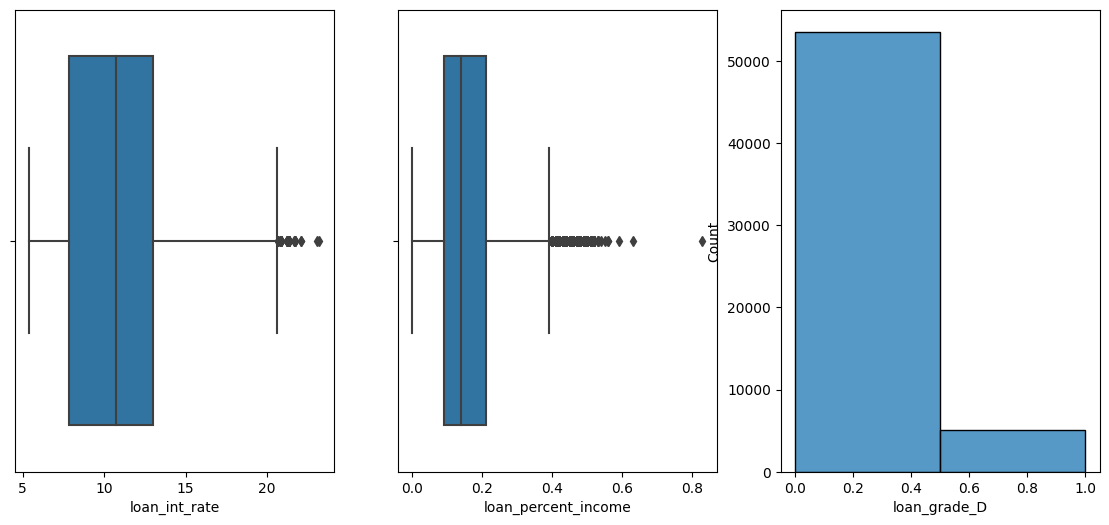

In [40]:
import seaborn as sns
import matplotlib.pyplot as plt
fig, axes = plt.subplots(1, 3, figsize=(14, 6))
sns.boxplot(data=train_df_encoded, x='loan_int_rate', ax=axes[0])
sns.boxplot(data=train_df_encoded, x='loan_percent_income', ax=axes[1])
sns.histplot(data=train_df_encoded, x='loan_grade_D', ax=axes[2], bins=2)

In [41]:
import numpy as np
def removing_outliers(df, cols):
    res_df = df.copy()
    for col in cols:
        [q1, q2, q3]  = np.quantile(res_df.loc[:, col],[0.25, 0.5, 0.75] )
        iqr = q3 - q1
        lower_limit = q1 - 1.5 * iqr
        upper_limit = q1+1.5 * iqr
        res_df = res_df[(res_df.loc[:, col] >= lower_limit) & (res_df.loc[:, col] <= upper_limit)]
    return res_df

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/seaborn/_stats/counting.py:137: RuntimeWarning: Converting input from bool to <class 'numpy.uint8'> for compatibility.
  bin_edges = np.histogram_bin_edges(vals, bins, binrange, weight)
/opt/conda/lib/python3.10/site-packages/seaborn/_stats/counting.py:176: RuntimeWarning: Converting input from bool to <class 'numpy.uint8'> for compatibility.
  hist, edges = np.histogram(vals, **bin_kws, weights=weights, density=density)


<Axes: xlabel='loan_grade_D', ylabel='Count'>

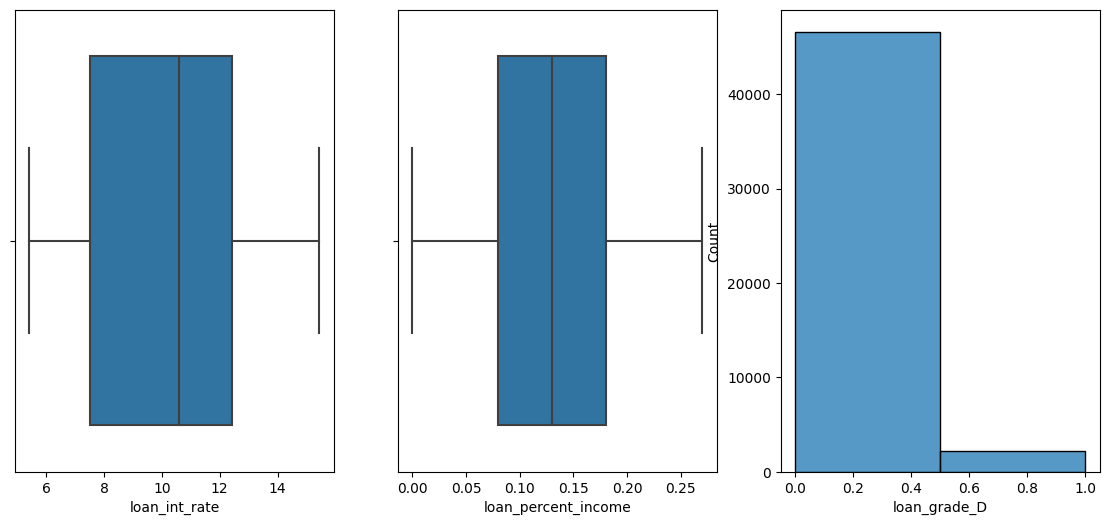

In [42]:
out_df = removing_outliers(train_df_encoded, ['loan_int_rate', 'loan_percent_income'])
fig, axes = plt.subplots(1, 3, figsize=(14, 6))
sns.boxplot(data=out_df, x='loan_int_rate', ax=axes[0])
sns.boxplot(data=out_df, x='loan_percent_income', ax=axes[1])
sns.histplot(data=out_df, x='loan_grade_D', ax=axes[2], bins=2)

In [43]:
X = out_df[useful_cols]
y = out_df.loc[:, 'loan_status']
X.shape, y.shape

((48788, 12), (48788,))

In [44]:
from sklearn.model_selection import StratifiedShuffleSplit

sss = StratifiedShuffleSplit(n_splits=1, test_size=0.3, random_state=32)
for tr_idx, test_idx in sss.split(X, y):
    X_train, y_train = X.iloc[tr_idx], y.iloc[tr_idx]
    X_test, y_test = X.iloc[test_idx], y.iloc[test_idx]
X_train.shape, y_train.shape, X_test.shape, y_test.shape

((34151, 12), (34151,), (14637, 12), (14637,))

In [45]:
X_train.loc[:, 'loan_grade_D'] = X_train.loc[:, 'loan_grade_D'].astype(int)
X_train.loc[:, 'loan_grade_D']

/tmp/ipykernel_30/2536925820.py:1: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '[0 0 0 ... 0 0 0]' has dtype incompatible with bool, please explicitly cast to a compatible dtype first.
  X_train.loc[:, 'loan_grade_D'] = X_train.loc[:, 'loan_grade_D'].astype(int)


14798    0
19170    0
18058    0
16872    0
49511    0
        ..
47392    0
21507    0
48007    0
55930    0
4313     0
Name: loan_grade_D, Length: 34151, dtype: int64

In [46]:
import tensorflow as tf
import tensorflow.keras as keras

from sklearn.preprocessing import StandardScaler, PolynomialFeatures

scaler = StandardScaler()
poly = PolynomialFeatures(degree=4, interaction_only=False)

X_train_poly = poly.fit_transform(X_train)
X_test_poly = poly.transform(X_test)
X_train_scaled = scaler.fit_transform(X_train_poly)
X_test_scaled = scaler.transform(X_test_poly)

model = keras.Sequential([
    keras.Input(shape=(X_train_scaled.shape[1],)),
    keras.layers.BatchNormalization(),
#     keras.layers.Dense(1000, activation='relu',kernel_initializer=keras.initializers.glorot_normal, kernel_regularizer=keras.regularizers.l1),
#     keras.layers.Dropout(0.01),
#     keras.layers.BatchNormalization(),
#     keras.layers.Dense(500, activation='relu',kernel_initializer=keras.initializers.glorot_normal, kernel_regularizer=keras.regularizers.l1),
#     keras.layers.Dropout(0.01),
#     keras.layers.BatchNormalization(),
    keras.layers.Dense(2000, activation='relu',kernel_initializer=keras.initializers.glorot_normal, kernel_regularizer=keras.regularizers.l1),
    keras.layers.Dropout(0.01),
    keras.layers.BatchNormalization(),
    keras.layers.Dense(1000, activation='relu',kernel_initializer=keras.initializers.glorot_normal, kernel_regularizer=keras.regularizers.l1),
#     keras.layers.Dropout(0.01),
    keras.layers.BatchNormalization(),
    keras.layers.Dense(500, activation='relu',kernel_initializer=keras.initializers.glorot_normal, kernel_regularizer=keras.regularizers.l1),
    keras.layers.Dropout(0.01),
    keras.layers.BatchNormalization(),
    keras.layers.Dense(250, activation='relu',kernel_initializer=keras.initializers.glorot_normal, kernel_regularizer=keras.regularizers.l1),
#     keras.layers.Dropout(0.10),
    keras.layers.BatchNormalization(),
    keras.layers.Dense(125, activation='relu',kernel_initializer=keras.initializers.glorot_normal, kernel_regularizer=keras.regularizers.l1),
    keras.layers.Dropout(0.05),
    keras.layers.BatchNormalization(),
    keras.layers.Dense(75, activation='relu',kernel_initializer=keras.initializers.glorot_normal, kernel_regularizer=keras.regularizers.l1),
    keras.layers.BatchNormalization(),
    keras.layers.Dense(1, activation='sigmoid',kernel_initializer=keras.initializers.he_normal )

])

callbacks = [keras.callbacks.EarlyStopping(patience=75, restore_best_weights=True)]
model.compile(optimizer=keras.optimizers.Adam(learning_rate=0.001), loss=keras.losses.binary_crossentropy, metrics=[keras.metrics.binary_crossentropy])
model.fit(X_train_scaled, y_train, epochs=200,batch_size=32, validation_split=0.2, callbacks=callbacks)
test_loss, test_acc = model.evaluate(X_test_scaled, y_test, batch_size=32)

Epoch 1/200
854/854 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step - binary_crossentropy: 0.4224 - loss: 155.1514

I0000 00:00:1728377173.850228     143 asm_compiler.cc:369] ptxas warning : Registers are spilled to local memory in function 'input_slice_fusion_1', 16 bytes spill stores, 16 bytes spill loads



854/854 ━━━━━━━━━━━━━━━━━━━━ 34s 26ms/step - binary_crossentropy: 0.4223 - loss: 155.0212 - val_binary_crossentropy: 0.2052 - val_loss: 8.2396
Epoch 2/200
854/854 ━━━━━━━━━━━━━━━━━━━━ 4s 4ms/step - binary_crossentropy: 0.2254 - loss: 7.9894 - val_binary_crossentropy: 1.0178 - val_loss: 8.6657
Epoch 3/200
854/854 ━━━━━━━━━━━━━━━━━━━━ 4s 4ms/step - binary_crossentropy: 0.2245 - loss: 7.7678 - val_binary_crossentropy: 0.2171 - val_loss: 7.5065
Epoch 4/200
854/854 ━━━━━━━━━━━━━━━━━━━━ 4s 4ms/step - binary_crossentropy: 0.2187 - loss: 7.5862 - val_binary_crossentropy: 0.2228 - val_loss: 7.3747
Epoch 5/200
854/854 ━━━━━━━━━━━━━━━━━━━━ 4s 4ms/step - binary_crossentropy: 0.2053 - loss: 7.3780 - val_binary_crossentropy: 0.1949 - val_loss: 7.1520
Epoch 6/200
854/854 ━━━━━━━━━━━━━━━━━━━━ 4s 4ms/step - binary_crossentropy: 0.2123 - loss: 7.2614 - val_binary_crossentropy: 0.1947 - val_loss: 7.2741
Epoch 7/200
854/854 ━━━━━━━━━━━━━━━━━━━━ 4s 4ms/step - binary_crossentropy: 0.2079 - loss: 7.2227 - va

In [47]:
test_loss, test_acc

(7.008769512176514, 0.19508670270442963)

In [48]:
final_test_df = pd.read_csv('/kaggle/input/playground-series-s4e10/test.csv')
final_test_df_encoded = pd.get_dummies(data=final_test_df, columns=final_test_df.select_dtypes('object').columns)
final_test_df_useful = final_test_df_encoded[useful_cols]

final_test_df_useful.shape

(39098, 12)

In [49]:
X_final_test_poly = poly.fit_transform(final_test_df_useful)
X_final_test_scaled = scaler.fit_transform(X_final_test_poly)
y_pred = model.predict(X_final_test_scaled)

1222/1222 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step


In [50]:
y_pred

array([[0.08028686],
       [0.01808454],
       [0.09485392],
       ...,
       [0.01627106],
       [0.21827926],
       [0.03663739]], dtype=float32)

In [51]:
y_pred = y_pred.ravel()
submission = pd.DataFrame({
    'id': final_test_df['id'],  # Replace 'id' with the correct column name from the test set
    'loan_status': y_pred  # Replace 'target' with the actual name of the prediction column expected by Kaggle
})


In [52]:
submission.head()

,id,loan_status
0,58645,0.080287
1,58646,0.018085
2,58647,0.094854
3,58648,0.018970
4,58649,0.145349


In [53]:
submission.to_csv('submission_3.csv', index=False)